## import libraries


In [1]:
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
import PIL
import os 
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm
from imblearn.over_sampling import SMOTE

2025-02-08 10:32:07.653174: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-08 10:32:07.832365: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-08 10:32:07.832392: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-08 10:32:07.832399: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-08 10:32:07.885020: I tensorflow/core/platform/cpu_feature_g

## load dataset


In [2]:
# The following code will only execute
# successfully when compression is complete

import kagglehub

# Download latest version
path = kagglehub.dataset_download("vedjosh/alzheimer-mri")

print("Path to dataset files:", path)

  1%|          | 5.00M/560M [00:00<00:16, 36.3MB/s]

100%|██████████| 560M/560M [00:02<00:00, 242MB/s]  

Extracting files...


Path to dataset files: /home/user/.cache/kagglehub/datasets/vedjosh/alzheimer-mri/versions/1


In [3]:
import os

path = "/home/user/.cache/kagglehub/datasets/vedjosh/alzheimer-mri/versions/1"  # Fix path

# Initialize lists
non_demented = []

demented = []

# Corrected paths
categories = {
    "Non_Demented": non_demented,

    "Demented": demented,
}

# Traverse each category and collect image paths
for category, image_list in categories.items():
    category_path = os.path.join(path, category)  # Corrected category path
    if os.path.exists(category_path):  # Ensure folder exists
        for root, _, filenames in os.walk(category_path):
            for filename in filenames:
                if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Only images
                    image_list.append(os.path.join(root, filename))
    else:
        print(f"Warning: {category_path} does not exist!")

# Print results
print(f"Non-demented images: {len(non_demented)}")

print(f"Moderate demented images: {len(demented)}")

# Verify total images counted
total_count = len(non_demented) + len(demented)
print(f"Total images categorized: {total_count}")


Non-demented images: 19215
Moderate demented images: 19215
Total images categorized: 38430


In [4]:
import os
import pandas as pd

path = "/home/user/.cache/kagglehub/datasets/vedjosh/alzheimer-mri/versions/1"

# List files in the dataset directory
print("Files in dataset directory:", os.listdir(path))

# Count total number of images
image_count = sum([len(files) for _, _, files in os.walk(path)])
print(f"Total images found: {image_count}")

# Collect image paths and generate labels if available
images = []
labels = []

for root, _, files in os.walk(path):
    for file in files:
        if file.lower().endswith(('jpg', 'jpeg', 'png', 'bmp', 'tif')):
            images.append(os.path.join(root, file))
            # Assuming labels are part of folder names, extract accordingly if needed
            labels.append(os.path.basename(root))

# Create a DataFrame
df = pd.DataFrame({'image': images, 'label': labels})
print(df.head())


Files in dataset directory: ['Demented', 'Non_Demented']
Total images found: 38430
                                               image     label
0  /home/user/.cache/kagglehub/datasets/vedjosh/a...  Demented
1  /home/user/.cache/kagglehub/datasets/vedjosh/a...  Demented
2  /home/user/.cache/kagglehub/datasets/vedjosh/a...  Demented
3  /home/user/.cache/kagglehub/datasets/vedjosh/a...  Demented
4  /home/user/.cache/kagglehub/datasets/vedjosh/a...  Demented


## samples each class

/tmp/ipykernel_2032/1748014159.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df.label,palette='Set1')


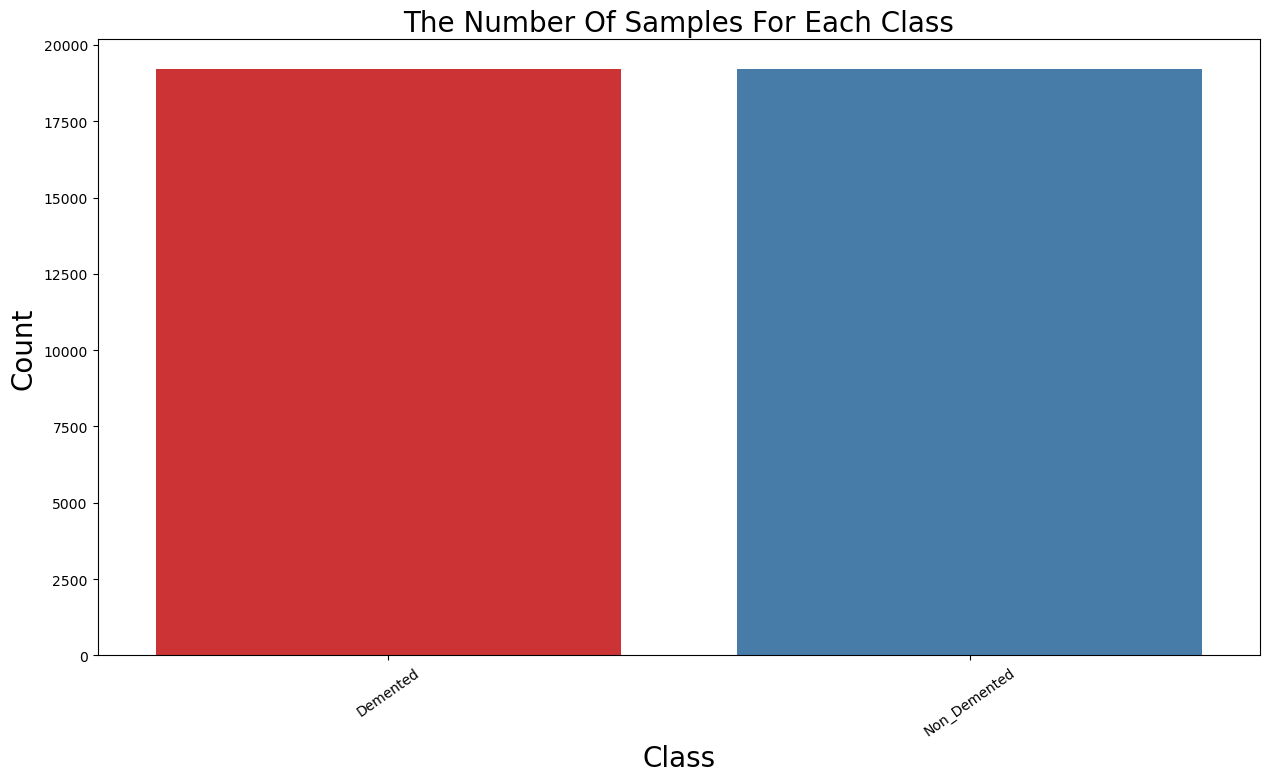

In [5]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=df.label,palette='Set1')
ax.set_xlabel("Class",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
plt.title('The Number Of Samples For Each Class',fontsize=20)
plt.grid(False)
plt.xticks(rotation=35)
plt.show()

## visualise few images

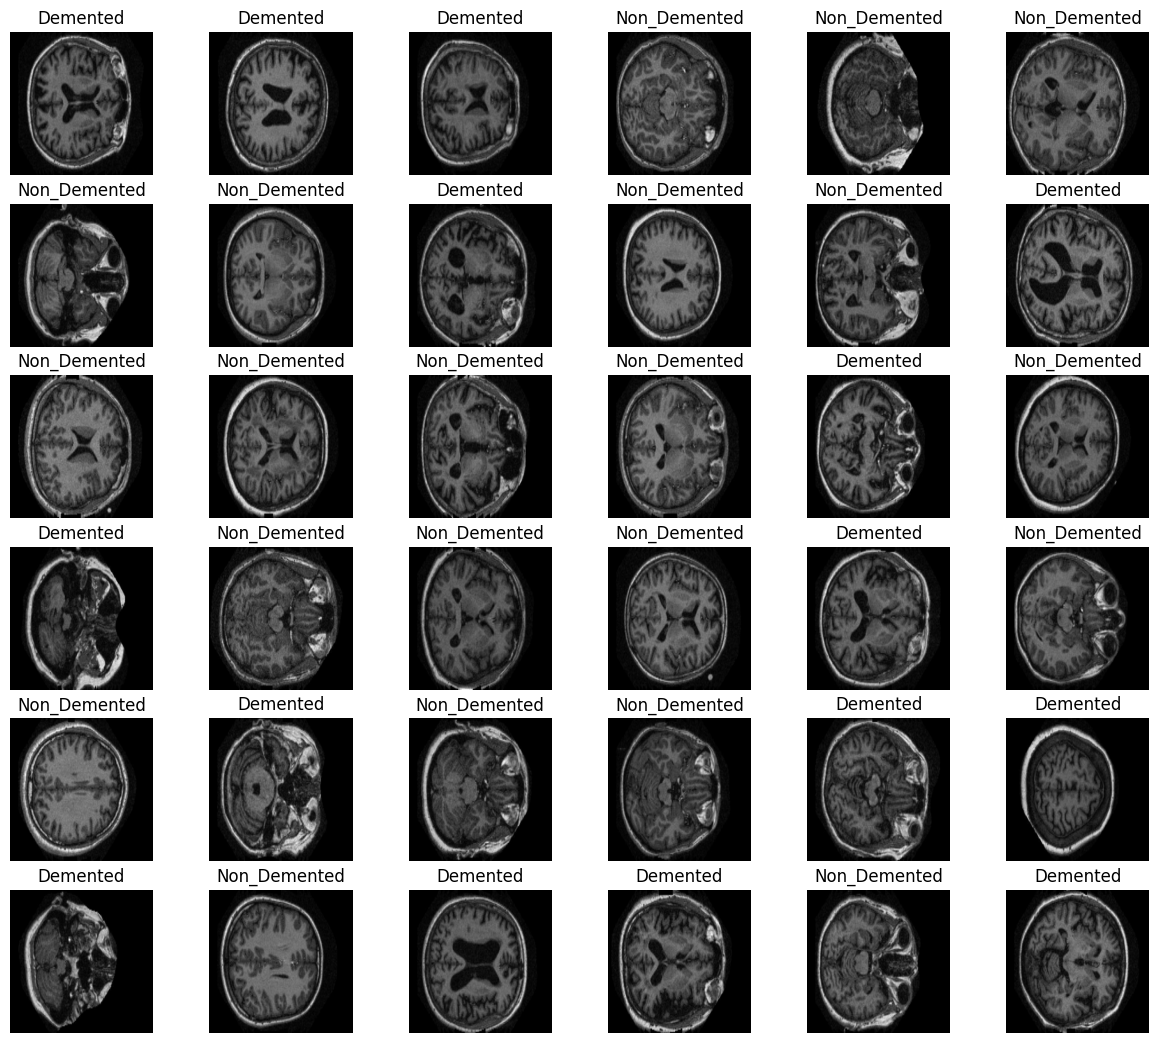

In [9]:
import random
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(15,13))
num = 36

for n, i in enumerate(random.sample(range(len(df)), num)):
    plt.subplot(6,6, n + 1)
    img = cv2.imread(df.image[i])
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(df.label[i], fontsize=12)

plt.show() 

In [6]:
print(len(non_demented))
print(len(demented))

19215
19215


In [9]:
encoder= OneHotEncoder()
encoder.fit([[0],[1]])

OneHotEncoder()

## label and encoding merge

In [10]:
data = []
result = []
for s in non_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        

for s in demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [11]:
X = np.array(data)

In [12]:
X.shape

(38430, 128, 128, 3)

In [ ]:
y = np.array(result)
y.shape

(38430, 1, 2)

In [15]:
y=y.reshape(38430,2)
y=np.argmax(y, axis=1)
y

array([0, 0, 0, ..., 1, 1, 1])

In [16]:
y.shape

(38430,)

## train test split

In [17]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42, shuffle = True)

## model building

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(128,128, 3))


for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)  
x = Dropout(0.5)(x) 
x = Dense(128, activation='relu')(x)  
x = Dropout(0.5)(x)  
x = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

2025-02-08 10:39:19.949912: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-08 10:39:20.057646: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-08 10:39:20.059030: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

## model compile

In [20]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(
    monitor="val_loss",
    patience=7,
    verbose=0,
    mode="auto",
    restore_best_weights=True,
)

In [25]:
history= model.fit(X_train,y_train, validation_split=0.2,epochs=100,callbacks=[early_stopping],batch_size=128)

Epoch 1/100
193/193 [==============================] - 4s 22ms/step - loss: 0.1897 - accuracy: 0.9269 - val_loss: 0.1338 - val_accuracy: 0.9497
Epoch 2/100
193/193 [==============================] - 4s 21ms/step - loss: 0.1870 - accuracy: 0.9287 - val_loss: 0.1208 - val_accuracy: 0.9548
Epoch 3/100
193/193 [==============================] - 4s 21ms/step - loss: 0.1817 - accuracy: 0.9305 - val_loss: 0.1290 - val_accuracy: 0.9530
Epoch 4/100
193/193 [==============================] - 4s 21ms/step - loss: 0.1770 - accuracy: 0.9308 - val_loss: 0.1281 - val_accuracy: 0.9507
Epoch 5/100
193/193 [==============================] - 4s 21ms/step - loss: 0.1776 - accuracy: 0.9319 - val_loss: 0.1381 - val_accuracy: 0.9522
Epoch 6/100
193/193 [==============================] - 4s 21ms/step - loss: 0.1745 - accuracy: 0.9325 - val_loss: 0.1454 - val_accuracy: 0.9478
Epoch 7/100
193/193 [==============================] - 4s 21ms/step - loss: 0.1740 - accuracy: 0.9314 - val_loss: 0.1171 - val_accuracy:

In [26]:
model.evaluate(X_test, y_test)

241/241 [==============================] - 1s 6ms/step - loss: 0.0961 - accuracy: 0.9630


[0.0961369052529335, 0.9630497097969055]

## accuracy and loss visualise

<Axes: >

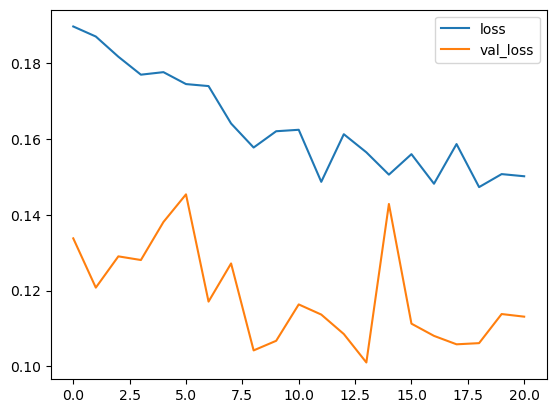

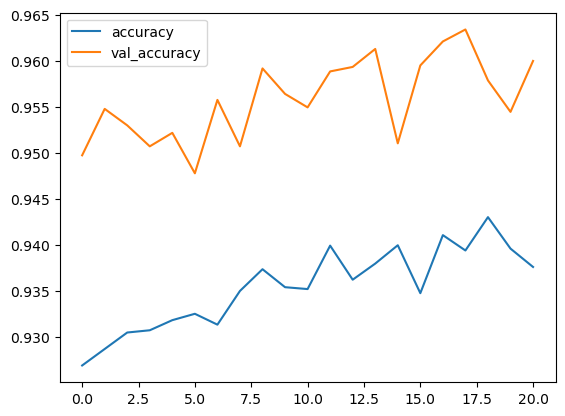

In [27]:
import pandas as pd 

ef = pd.DataFrame(history.history)

ef[['loss','val_loss']].plot()

ef[['accuracy', 'val_accuracy']].plot()

## performance matrix

In [28]:
predicted_test_labels = model.predict(X_test)
res = model.predict(X_test)
predicted_test_labels =  np.argmax(predicted_test_labels,axis= 1 )
predicted_test_labels[1]
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,ypred))

print(classification_report(y_test,ypred))
print(confusion_matrix(y_test,ypred))


 11/241 [>.............................] - ETA: 1s

241/241 [==============================] - 1s 5ms/step
0.9630497007546188
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      3826
           1       0.95      0.98      0.96      3860

    accuracy                           0.96      7686
   macro avg       0.96      0.96      0.96      7686
weighted avg       0.96      0.96      0.96      7686

[[3627  199]
 [  85 3775]]


## prediction classes

 11/241 [>.............................] - ETA: 1s

241/241 [==============================] - 1s 5ms/step


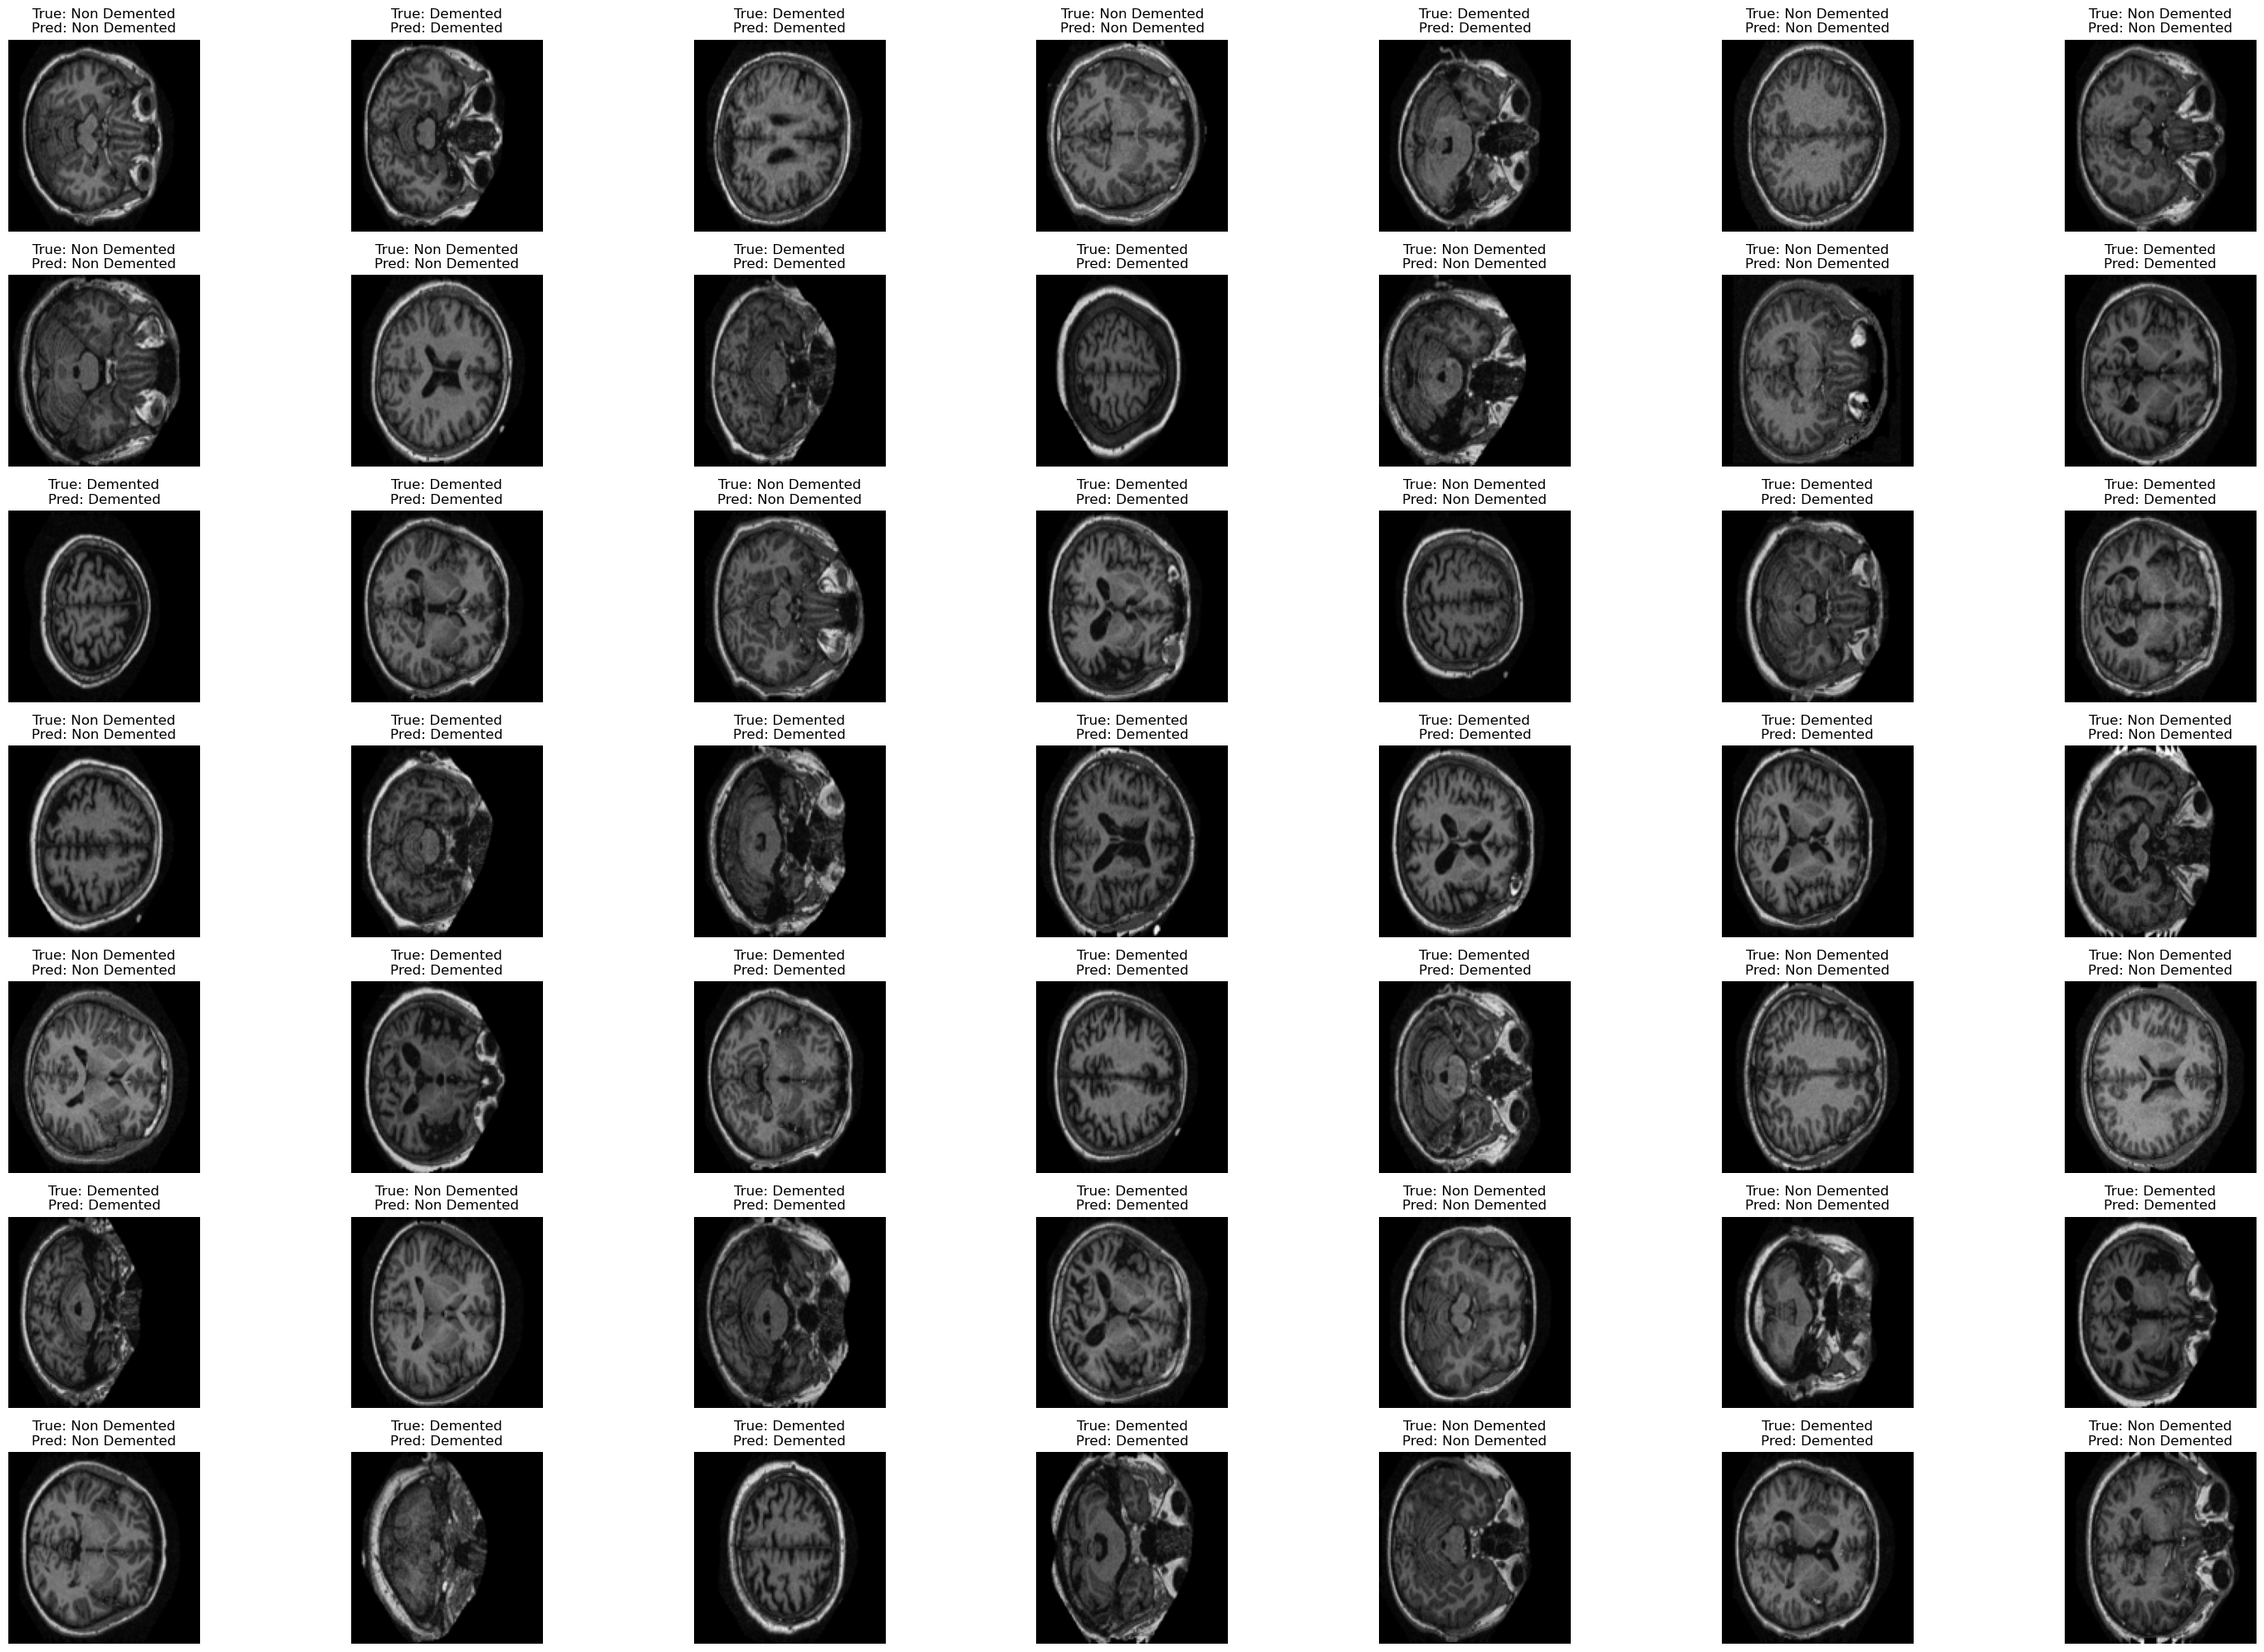

In [29]:
import numpy as np
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1) 

class_names = [
    "Non Demented",               
    "Demented"     
]

num_images = 49
indices = np.random.choice(len(X_test), num_images, replace=False)

plt.figure(figsize=(30,20))

for i, idx in enumerate(indices):
    plt.subplot(7, 7, i + 1)  
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f'True: {class_names[y_test[idx]]}\nPred: {class_names[y_pred[idx]]}')
    plt.axis('off')  
plt.tight_layout()
plt.show()

## correct predictions

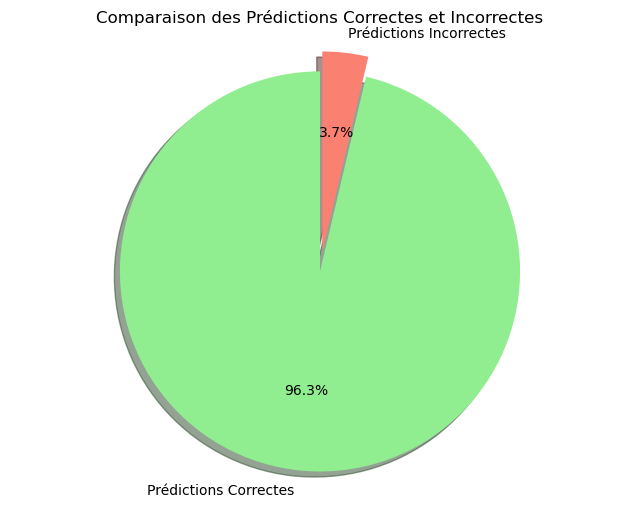

In [30]:
import numpy as np
import matplotlib.pyplot as plt


correct_predictions = np.sum(y_test == ypred)
incorrect_predictions = np.sum(y_test != ypred)

labels = ['Prédictions Correctes', 'Prédictions Incorrectes']
sizes = [correct_predictions, incorrect_predictions]
colors = ['lightgreen', 'salmon']
explode = (0.1, 0)  

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')  
plt.title('Comparaison des Prédictions Correctes et Incorrectes')
plt.show()

In [31]:
sizes = [correct_predictions, incorrect_predictions]
print("nombre de predictions correctes : ",correct_predictions)
print("nombre de predictions incorrectes : ",incorrect_predictions)

nombre de predictions correctes :  7402
nombre de predictions incorrectes :  284


In [32]:
def names(number):
    if number == 0:
        return 'Non Demented'
    elif number == 1:
        return 'Demented'
    else:
        return 'Error in Prediction'

## testing sample images

Checking file: /home/user/.cache/kagglehub/datasets/vedjosh/alzheimer-mri/versions/1/Demented/OAS1_0003_MR1_mpr-2_129.jpg
File exists. Proceeding...
99.99% Confidence This Is Demented


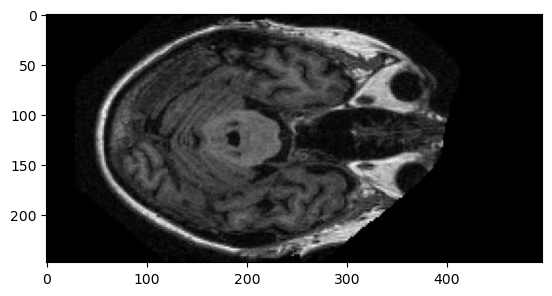

In [34]:
from matplotlib.pyplot import imshow
path = "/home/user/.cache/kagglehub/datasets/vedjosh/alzheimer-mri/versions/1"

import os

# Corrected path
file_path = os.path.join(path, "Demented", "OAS1_0003_MR1_mpr-2_129.jpg")
print("Checking file:", file_path)

# Verify file existence
if not os.path.exists(file_path):
    print("Error: File not found!")
else:
    print("File exists. Proceeding...")

from matplotlib.pyplot import imshow
from PIL import Image  # Ensure PIL is imported
import numpy as np

# Open the image using the corrected path
img = Image.open(file_path)

# Resize and preprocess the image
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)

# Ensure 'model' is defined and loaded properly
res = model.predict_on_batch(x)

# Get classification result
classification = np.argmax(res)  # Use np.argmax for better efficiency
imshow(img)
print(f"{res[0][classification]*100:.2f}% Confidence This Is {names(classification)}")


File found. Proceeding...
100.00% Confidence This Is Non Demented


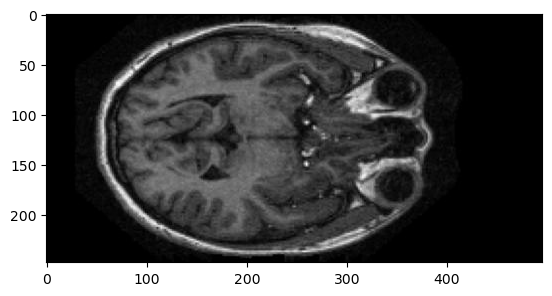

In [37]:
import os
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image

# Correct dataset path
path = "/home/user/.cache/kagglehub/datasets/vedjosh/alzheimer-mri/versions/1"

# Construct correct file path
file_path = os.path.join(path, "Non_Demented", "OAS1_0006_MR1_mpr-3_117.jpg")

# Verify if the file exists
if not os.path.exists(file_path):
    print(f"Error: File '{file_path}' not found!")
else:
    print("File found. Proceeding...")

    # Load the image
    img = Image.open(file_path)

    # Resize and preprocess the image
    x = np.array(img.resize((128,128)))
    x = x.reshape(1, 128, 128, 3)

    # Ensure 'model' is loaded before prediction
    res = model.predict_on_batch(x)

    # Get classification result using np.argmax for efficiency
    classification = np.argmax(res)

    # Display the image
    imshow(img)
    print(f"{res[0][classification]*100:.2f}% Confidence This Is {names(classification)}")


## save model in .h5 or pkl

In [38]:
import joblib

# Save the trained model
joblib.dump(model, "alzheimer_model_balanced.pkl")

print("Alzheimer's prediction model saved successfully as alzheimer_model_balanced.pkl")


Alzheimer's prediction model saved successfully as alzheimer_model_balanced.pkl


In [45]:
from huggingface_hub import HfApi

# Define your repository name (change 'your-username' accordingly)
repo_name = "malharinamdar/alzheimer_balanced_1"

# Initialize API
api = HfApi()

# Create a new repo on Hugging Face Hub
api.create_repo(repo_name, private=False)  # Set `private=False` if you want it public

# Upload the .pkl file to the repo
api.upload_file(
    path_or_fileobj="/home/user/techfiesta/alzheimer_model_balanced.pkl",  # Your local .pkl file
    path_in_repo="alzheimer_balanced_1",  # File path in Hugging Face repo
    repo_id=repo_name,
)

print(f"Model uploaded successfully to: https://huggingface.co/techfiesta")


alzheimer_model_balanced.pkl:   0%|          | 0.00/106M [00:00<?, ?B/s]

Model uploaded successfully to: https://huggingface.co/techfiesta


In [42]:
import joblib
import tensorflow as tf

# Load the previously trained .pkl model
model = joblib.load("/home/user/techfiesta/alzheimer_model_balanced.pkl")

# Save model as a .h5 file (Keras format)
model.save("alzheimer_model_balanced.h5")


print("✅ Model successfully converted to TensorFlow format!")


✅ Model successfully converted to TensorFlow format!


/home/user/mambaforge/envs/env/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
